 ## Loading Packages and Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

C:\Users\DELL\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [9]:
train_data= pd.read_csv("C:/Users/DELL/Product-Sales-Outlet-at-BigMart-Datawarehouse/Product-Sales-Outlet-at-BigMart-Datawarehouse/train.csv")
test_data= pd.read_csv("C:/Users/DELL/Product-Sales-Outlet-at-BigMart-Datawarehouse/Product-Sales-Outlet-at-BigMart-Datawarehouse/test.csv")
print("train_shape:", train_data.shape) 
print("test_shape:", test_data.shape)

train_shape: (8523, 12)
test_shape: (5681, 11)


## EXPLORING THE DATA

In [10]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [11]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [12]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


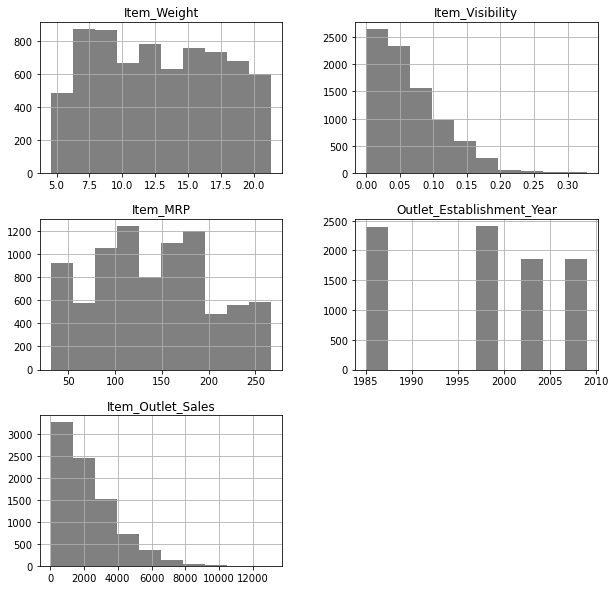

In [14]:
train_data.hist(figsize = (10,10),color='gray');

In [15]:
categorical_cols = train_data.select_dtypes(include=['object']).columns
numbers_cols = train_data.select_dtypes(exclude=['object']).columns

In [16]:
print(train_data[categorical_cols].columns)

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')


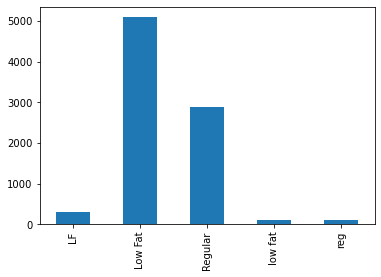

In [17]:
train_data['Item_Fat_Content'].value_counts().sort_index().plot.bar();

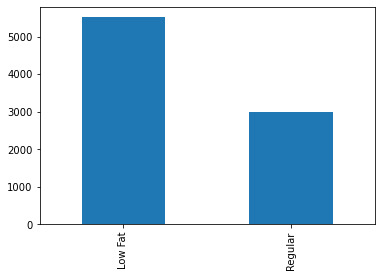

In [18]:
train_data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'},inplace = True)
train_data['Item_Fat_Content'].value_counts().sort_index().plot.bar();

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


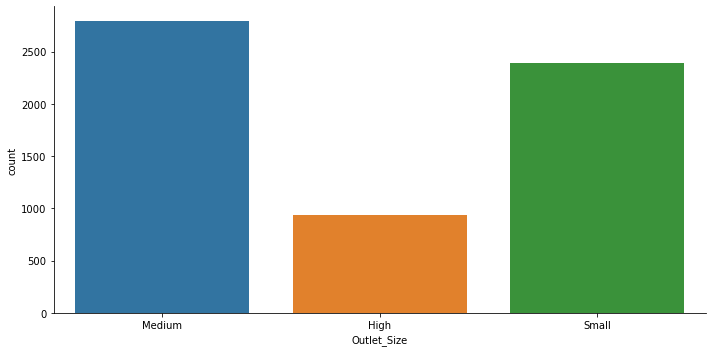

In [19]:
sns.catplot('Outlet_Size',kind = 'count',data = train_data,aspect =2);

In [20]:
train_data['Item_Weight'].isnull().sum(),train_data['Outlet_Size'].isnull().sum()

(1463, 2410)

## Missing Value Treatment


In [21]:
train_data["Item_Weight"]=train_data["Item_Weight"].fillna(np.mean(train_data["Item_Weight"]))

In [22]:
train_data['Item_Weight'].isnull().sum()

0

In [23]:
train_data["Outlet_Size"].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [24]:
train_data["Outlet_Size"] = train_data['Outlet_Size'].replace(np.nan, 'Medium')
train_data["Outlet_Size"].isnull().sum()

0

## Feature Engineering and Encoding Categorical Variables

In [25]:
train_data["Item_Outlet_Identifier"]= train_data["Item_Identifier"] + train_data["Outlet_Identifier"]

In [26]:
col= ("Item_Outlet_Identifier","Item_Fat_Content","Item_Type","Outlet_Size","Outlet_Location_Type","Outlet_Type")
for x in col:
    le= LabelEncoder()
    train_data[x]= le.fit_transform(train_data[x].values)
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
Item_Outlet_Identifier         int32
dtype: object

In [27]:
train_data= train_data.drop(["Item_Identifier", "Outlet_Identifier"], axis= 1)

In [28]:
train_data.head(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Outlet_Identifier
0,9.300000,0,0.016047,4,249.8092,1999,1,0,1,3735.1380,874
1,5.920000,1,0.019278,14,48.2692,2009,1,2,2,443.4228,48
2,17.500000,0,0.016760,10,141.6180,1999,1,0,1,2097.2700,3614
3,19.200000,1,0.000000,6,182.0950,1998,1,2,0,732.3800,6119
4,8.930000,0,0.000000,9,53.8614,1987,0,2,1,994.7052,7098
5,10.395000,1,0.000000,0,51.4008,2009,1,2,2,556.6088,4130
6,13.650000,1,0.012741,13,57.6588,1987,0,2,1,343.5528,3779
7,12.857645,0,0.127470,13,107.7622,1985,1,2,3,4022.7636,4018
8,16.200000,1,0.016687,5,96.9726,2002,1,1,1,1076.5986,2387
9,19.200000,1,0.094450,5,187.8214,2007,1,1,1,4710.5350,5422


## SPLITTING THE DATASET

In [29]:
X= train_data.drop("Item_Outlet_Sales", axis= 1)
y= train_data["Item_Outlet_Sales"]

In [33]:
X_train, X_val, y_train, y_val= train_test_split(X,y, test_size= 0.2, random_state= 0)

## Linear Regression


In [34]:
LR= LinearRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_val)

In [36]:
r2score= r2_score(y_val,y_pred)
rmse= np.sqrt(mean_squared_error(y_val,y_pred))

In [37]:
print("r2score : ",r2score)
print("rmse : ",rmse)

r2score :  0.5105986377868208
rmse :  1196.8329053081357


## Gradient Boosted Regressor model



In [38]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.01)
GBoost.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=3000)

In [40]:
y_pred=GBoost.predict(X_val)
r2score= r2_score(y_val,y_pred)
rmse= np.sqrt(mean_squared_error(y_val,y_pred))

In [41]:
print("r2score : ",r2score)
print("rmse : ",rmse)

r2score :  0.570905359279112
rmse :  1120.6693113307676


## Final Predictions On The Test Dataset

In [43]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

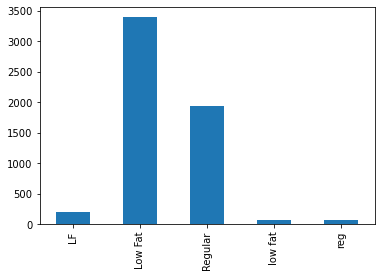

In [44]:
test_data['Item_Fat_Content'].value_counts().sort_index().plot.bar();

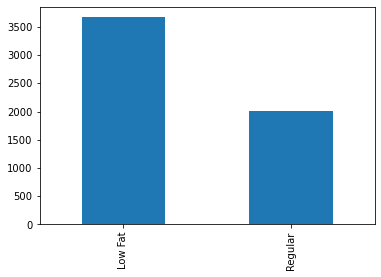

In [45]:
test_data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'},inplace = True)
test_data['Item_Fat_Content'].value_counts().sort_index().plot.bar();

In [47]:
test_data['Item_Weight'].isnull().sum(),test_data['Outlet_Size'].isnull().sum()

(976, 1606)

In [48]:
test_data["Item_Weight"]=test_data["Item_Weight"].fillna(np.mean(test_data["Item_Weight"]))

In [49]:
test_data["Outlet_Size"].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [50]:
test_data["Outlet_Size"] = test_data['Outlet_Size'].replace(np.nan, 'Medium')

In [51]:
test_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [54]:
test_data["Item_Outlet_Identifier"]= test_data["Item_Identifier"] + test_data["Outlet_Identifier"]

In [55]:
col= ("Item_Outlet_Identifier","Item_Fat_Content","Item_Type","Outlet_Size","Outlet_Location_Type","Outlet_Type")
for x in col:
    le= LabelEncoder()
    test_data[x]= le.fit_transform(test_data[x].values)
test_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Identifier         int32
dtype: object

In [56]:
test_data= test_data.drop(["Item_Identifier", "Outlet_Identifier"], axis= 1)

In [57]:
test_data.dtypes

Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Identifier         int32
dtype: object

In [58]:
y_test_pred = GBoost.predict(test_data)

In [59]:
pd.DataFrame(y_test_pred).head(15)

,0
0,1592.965223
1,1401.476035
2,517.290839
3,2442.257917
4,6395.080583
5,1906.326841
6,578.596796
7,2186.808041
8,1501.817025
9,3075.528785


In [62]:
Test_Pred = pd.read_csv('C:/Users/DELL/Product-Sales-Outlet-at-BigMart-Datawarehouse/Product-Sales-Outlet-at-BigMart-Datawarehouse/test.csv')
Test_Pred['Item_Outlet_Sales']=y_test_pred
Test_Pred.to_csv("Test_Pred.csv",index=False)